# Assignment

## Business Understanding

The goal of this task is to build a classifier using the kNN algorithm to predict the target value 'Diagnosis' in the data. The performance of this classifier will be investigated and reported.
Firstly we will import few libraries such as:
- Pandas (To work with the dataset)
- fetch_ucirepo function from ucimlrepo (To load the dataset from the UCI Machine Learning Repository)
- KNeighborsClassifier function from sklearn.neighbors (Model that predicts a samples class based on it's nearest neighbors)
- StandardScaler function from sklearn.preprocessing (To normalize the data for better model performance)

We then proceed to fetch the dataset from the repository and then store the dataset to the 'data' variable.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
# data (as pandas dataframes)
data = breast_cancer_wisconsin_diagnostic.data.original

## Data Understanding


Let's load our data and investigate the dataset variables. The dataset consists of mostly different numeric measurements such as:
- radius            - Mean of distances from center to points on the perimeter
- texture           - Standard deviation of gray-scale values
- perimeter         - The actual irregular outline of the tumor.
- area              - Area of the tumor
- smoothness        - Local variation in radius lengths
- compactness       - Calculated with: Perimeter^2 / Area - 1.0
- concavity         - Severity of concave portions of the contour
- concave points    - Number of concave portions of the contour
- symmetry          - Symmetry of the tumor
- fractal dimension - "Coastline approximation" - 1

We also have a variable called 'Diagnosis' which determines if the tumor is malignant or benign.
- M = Malignant
- B = Benign



In [44]:
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


From the data we understand that each row represents a different breast cancer case, with various features measured for each case. The target variable is the diagnosis, which indicates whether the tumor is malignant or benign.

Next we wanna check how many rows of malignant and benign cases are in the dataset to understand the class distribution.

In [45]:
# Printing data distribution
diagnosis_counts = data['Diagnosis'].value_counts()
print("Diagnosis distribution:")
print(diagnosis_counts)

Diagnosis distribution:
Diagnosis
B    357
M    212
Name: count, dtype: int64


Next we wanna draw some histograms to visualize the distribution of the data. We split the data into two subsets based on the diagnosis (malignant and benign) and plot histograms for each feature to see how they differ between the two classes.


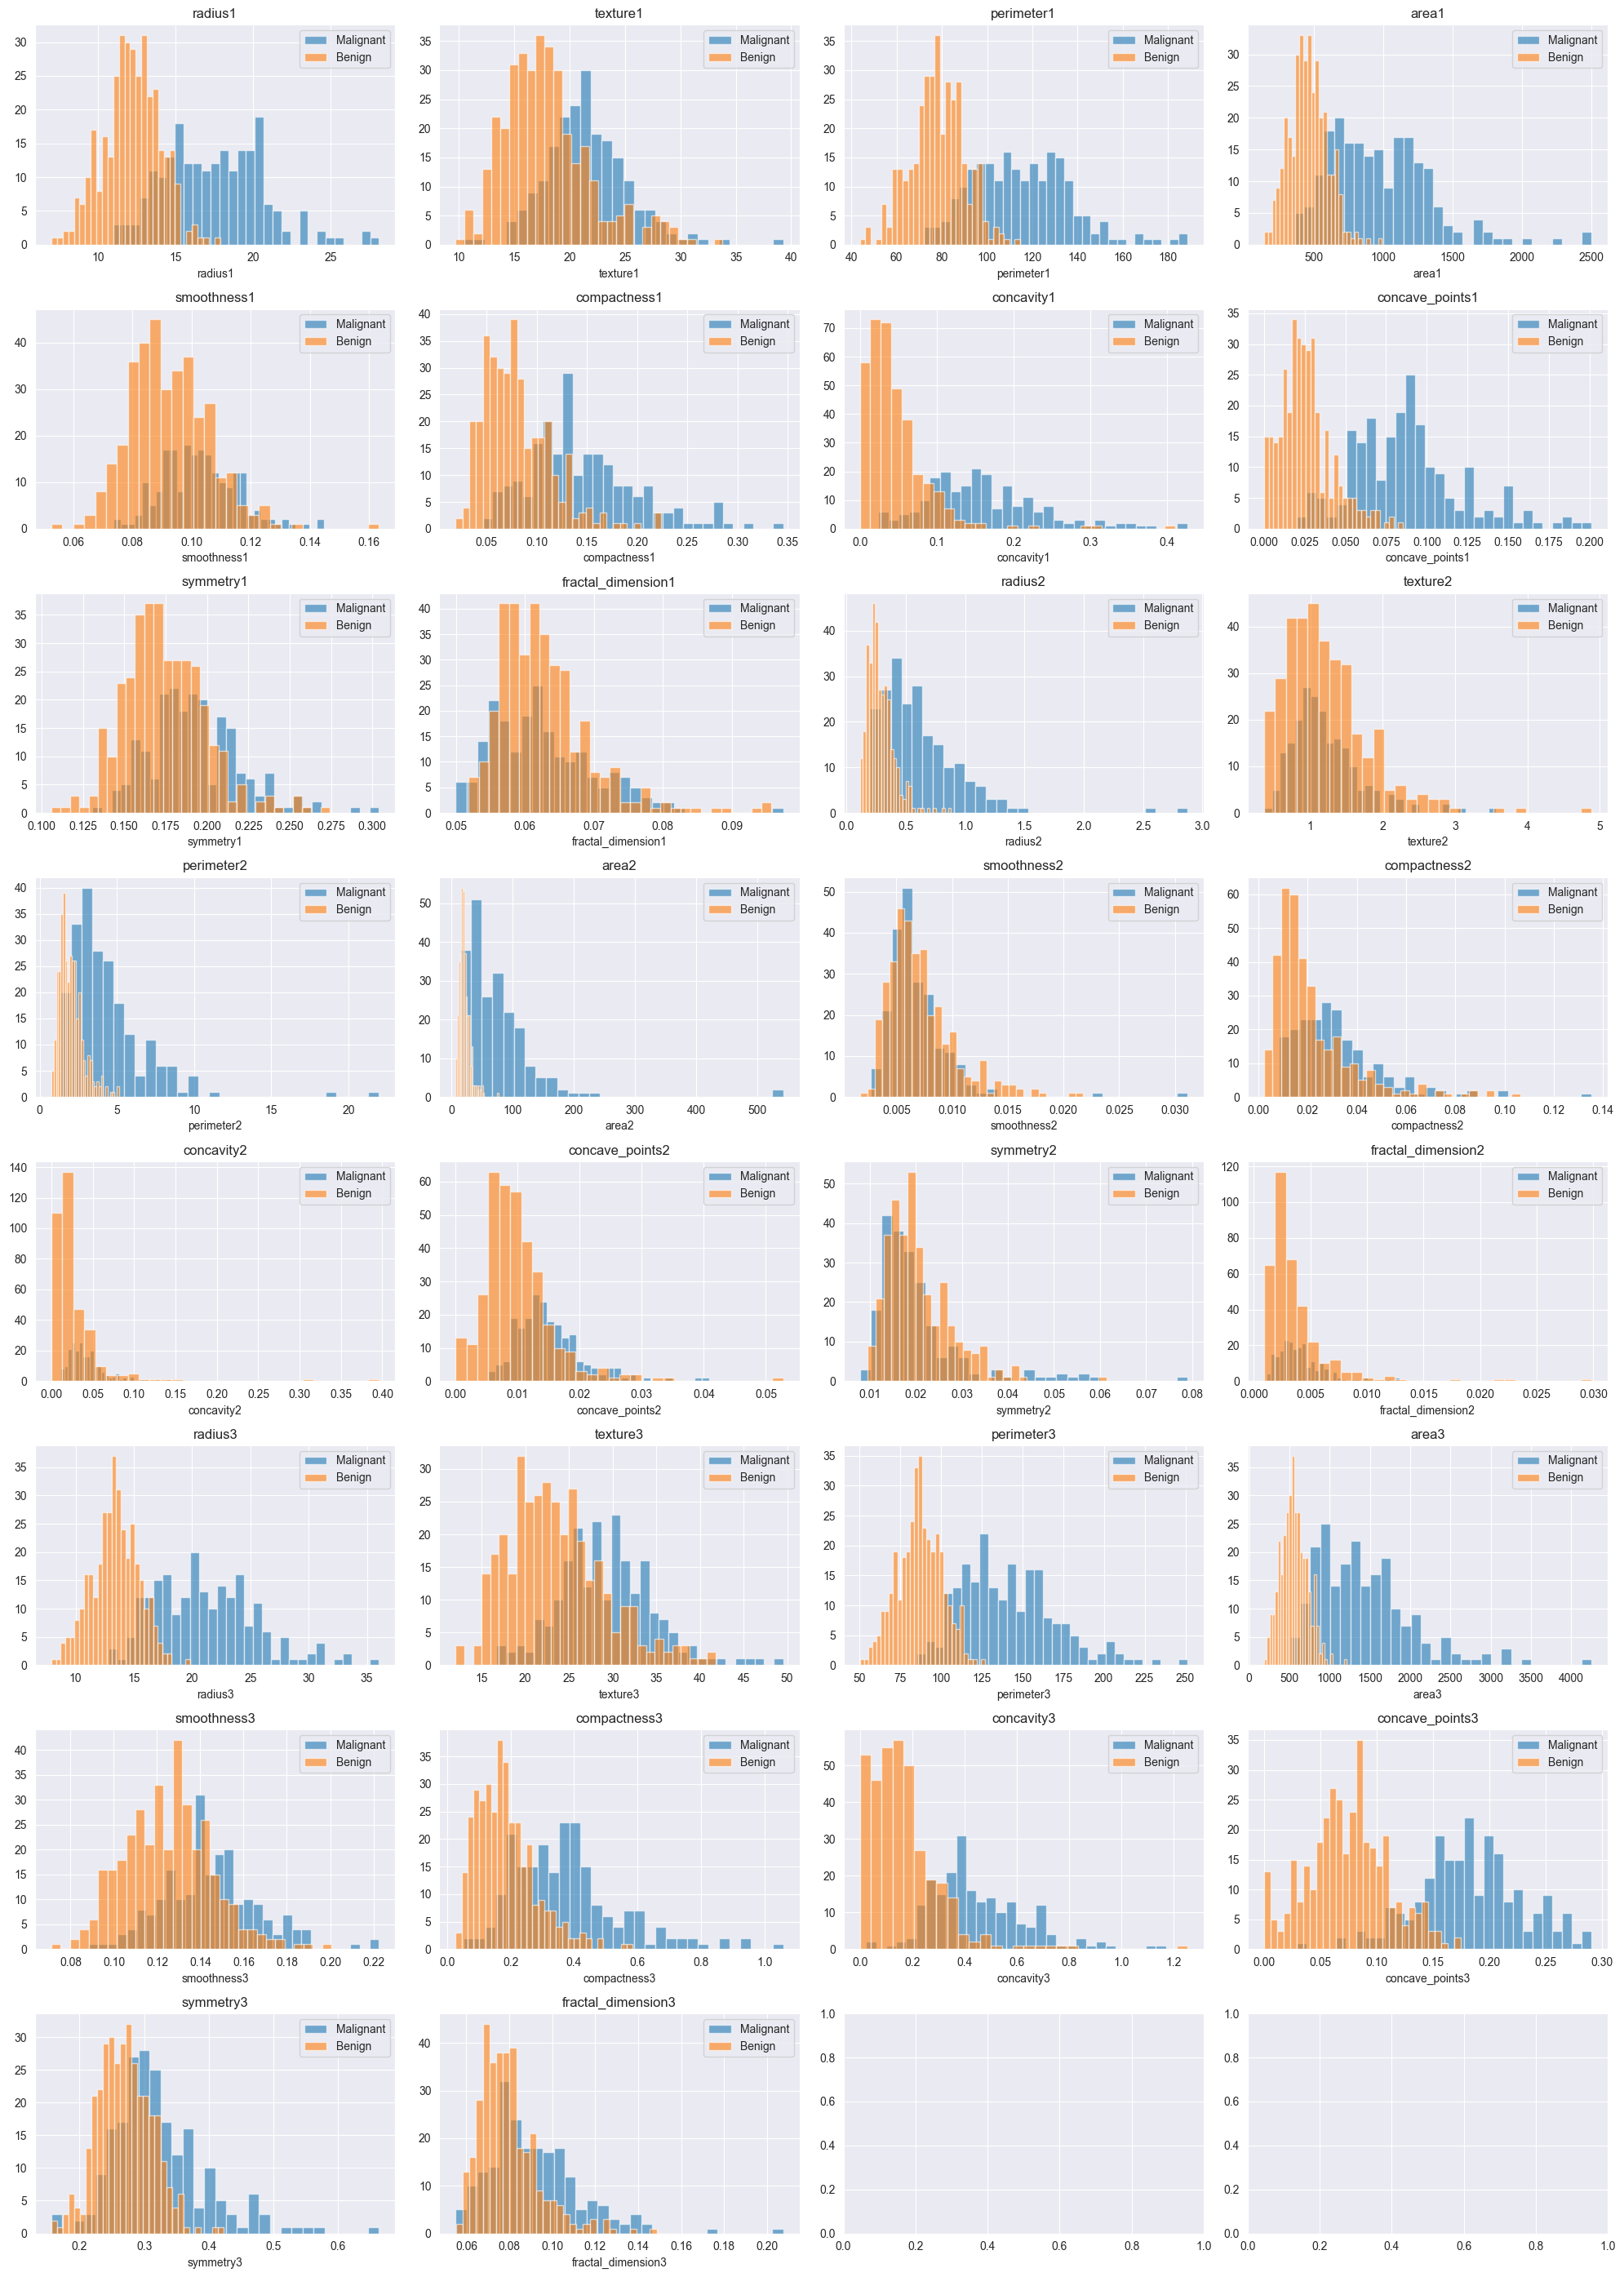

In [46]:
# Splitting the data
malignant_data = data[data['Diagnosis'] == 'M']
benign_data = data[data['Diagnosis'] == 'B']

# dropping the ID and Diagnosis columns for plotting
malignant_data = malignant_data.drop(columns=['ID', 'Diagnosis'])
benign_data = benign_data.drop(columns=['ID', 'Diagnosis'])

# fig is for the whole figure, axes is for the individual subplots
fig, axes = plt.subplots(8, 4, figsize=(20, 28))
# axes.flatten() is used to convert the 2D array of axes into a 1D array for easier iteration
axes = axes.flatten()

# We know that both dataframes have the same columns, so we can use either for index and column names.
for i, column in enumerate(malignant_data.columns):
    ax = axes[i] # Temporary variable for the current subplot
    ax.hist(malignant_data[column], bins=30, alpha=0.6, label='Malignant') # Plot histogram for malignant data
    ax.hist(benign_data[column], bins=30, alpha=0.6, label='Benign') # Plot histogram for benign data
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

After spending time investigating the graphs, we can see that certain features such as radius, perimeter, area, concavity, and concave points show clear differences between malignant and benign cases. Malignant tumors tend to have higher values for these features compared to benign tumors. Other features like texture, smoothness, compactness, symmetry, and fractal dimension show more overlap between the two classes, indicating they may be less effective for distinguishing between malignant and benign cases.

## Data Preparation

Before we can start any modeling we need to check few things and prepare the data accordingly. First we need to check if there are any missing values in the dataset.

In [47]:
# Check for the total amount of missing values combined in each column
missing_values = data.isnull().sum()
print("Total missing values in each column: " + str(missing_values.sum()))

Total missing values in each column: 0


This dataset does not contain any missing values. Next we wanna check that all the data is in numerical format since KNN algorithm requires numerical input.

In [48]:
# Print data types of each column
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
ID                      int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
Diagnosis              object
dtype: object

All the data seems to be in numerical data types except for the diagnosis column which is a string. To keep things more readable we can convert the diagnosis column to categorical data type.

In [49]:
# Converting diagnosis column to categorical data type
data['Diagnosis'] = data['Diagnosis'].astype('category')
print("Diagnosis column type after conversion: " + str(data["Diagnosis"].dtypes))

different_values = data['Diagnosis'].unique()
print("Different values in Diagnosis column after conversion: " + str(different_values))

Diagnosis column type after conversion: category
Different values in Diagnosis column after conversion: ['M', 'B']
Categories (2, object): ['B', 'M']


Final step we wanna do is standardizing the numerical data. This is important for KNN algorithm since it relies on distance calculations between data points. For the standardization we will use StandardScaler from sklearn library.

In [50]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Selecting numerical columns for scaling (excluding ID and Diagnosis)
numerical_columns = data.drop(columns=['ID', 'Diagnosis'])

# Grapping all the column names for later use
numerical_column_names = numerical_columns.columns

# Converting to NumPy array for scaling
numerical_values = numerical_columns.values

# Scaling the numerical values
scaled_values = scaler.fit_transform(numerical_values)

# Converting scaled values back to DataFrame
scaled_numerical_df = pd.DataFrame(scaled_values, columns=numerical_column_names)
scaled_numerical_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


All of the data should now be prepared and we can move to modeling.

## Modeling
In this stage we will select our algorithm for our task and set up our models and train them. For this task we will be using k-Nearest Neighbors algorithm.
 
First we need to set up our kNN models. We will create three models with different k values.
- Model 3 (k = 3)
- Model 9 (k = 9)
- Model 17 (k = 17)

In [51]:
model_3 = KNeighborsClassifier(n_neighbors=3)  # Using k=3 neighbors
model_9 = KNeighborsClassifier(n_neighbors=9)  # Using k=9 neighbors
model_17 = KNeighborsClassifier(n_neighbors=17)  # Using k=17 neighbors

Here we are defining our input values. 
- Features (Information used to make predictions)
- Target (What we are trying to predict)

In [52]:
# Splitting the data into features and target variable
features = scaled_numerical_df
target = data['Diagnosis']

Next we will shuffle and split our data into training sets.
- Training data size = 70%
- Test data size = 30%


In [53]:
# Shuffling and splitting the data into training and testing sets
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=321432422)

# Comparing the diagnosis distribution in training and testing sets
print("Training set diagnosis distribution:")
print(y_train.value_counts())
print("\nTesting set diagnosis distribution:")
print(y_test.value_counts())

Training set diagnosis distribution:
Diagnosis
B    260
M    138
Name: count, dtype: int64

Testing set diagnosis distribution:
Diagnosis
B    97
M    74
Name: count, dtype: int64


Now that the data has been splitted and shuffled, we can proceed to train the models with our training data.

In [ ]:
# Fitting the k-NN models with training data
model_3.fit(x_train, y_train)
model_9.fit(x_train, y_train)
model_17.fit(x_train, y_train)

Now that the model is trained, we can use it to make predictions on the test set. We will try out few simple prediction and see how well the model performs, but we will do more thorough evaluation in the next section.


In [55]:
# Making predictions on the test set and comparing results
sample_test_data = x_test.head(5)  # Taking first 5 samples from the test set
predictions = model_3.predict(sample_test_data)
print("Sample test data predictions:")
for i, prediction in enumerate(predictions):
    print(f"Sample {i+1}: Predicted Diagnosis = {prediction}, Actual Diagnosis = {y_test.iloc[i]}")

Sample test data predictions:
Sample 1: Predicted Diagnosis = B, Actual Diagnosis = B
Sample 2: Predicted Diagnosis = M, Actual Diagnosis = M
Sample 3: Predicted Diagnosis = M, Actual Diagnosis = M
Sample 4: Predicted Diagnosis = M, Actual Diagnosis = M
Sample 5: Predicted Diagnosis = B, Actual Diagnosis = B


## Evaluation

We currently have three different models trained with three different parameter for how many neightbors are taken into account for the decision of the diagnosis.

When taking the Accuracy, Precision and Recall values, we noted that the with the first 2 models, the values seem to be extremely close to eachother, if not exactly the same. However, when looking at the third model's values, which uses 17 neighbors for reference, the values start to be weaker by a few percentages.

This can be investigated further by providing confusion matrixes of all the models. When comparing the matrixes between eachother, the previously noted differences apply. The last model shows more false positives than the previous two models.

Below is loop which goes through all the models evaluating their Accuracy, Precision and Recall scores and turning the outputs into a pandas dataframe for easier showcase.

In [56]:
accuracy_scores = []
precision_scores = []
recall_scores = []
models = [model_3, model_9, model_17]

for model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')  # Considering 'M' (malignant) as the positive class
    recall = recall_score(y_test, y_pred, pos_label='M')  # Considering 'M' (malignant) as the positive class

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Creating a dataframe to summarize the results
evaluation_summary = pd.DataFrame({
    'Model': ['k=3', 'k=9', 'k=17'],
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

print("Evaluation Summary:")
evaluation_summary

Evaluation Summary:


,Model,Accuracy,Precision,Recall
0,k=3,0.953216,1.0,0.891892
1,k=9,0.953216,1.0,0.891892
2,k=17,0.935673,1.0,0.851351


After this, we showcase each model's performance in a confusion matrix, note the lack of benign false positives and the increase in melignant false positives in the last model.

In [57]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_model_3, labels=['M', 'B'])
# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_pred_model_3' is not defined

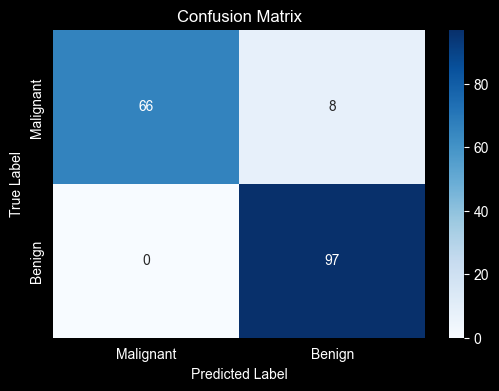

In [113]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_model_9, labels=['M', 'B'])
# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

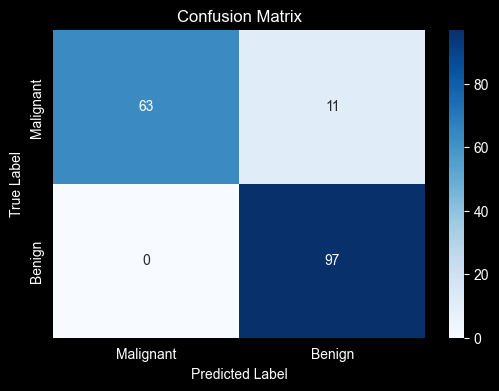

In [114]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_model_17, labels=['M', 'B'])
# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Evaluation Summary

In summary, when examining the dataset, using the KNN-classifier for prediction, it's best to keep the nearest neighbor values between number 3 and 9, using numbers past 10 start to give out more false positives and the Accuracy, Precision and Recall values start to lower.

## Deployment